#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection

In [12]:
con = mysql.connector.connect(user='root', password='21rSNSTBTLVTLV',
                             host='127.0.0.1', database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [55]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [85]:
employees_year = """
SELECT YEAR(hire_date)  as hire_year, COUNT(emp_no) as amount_employees 
FROM employees 
GROUP BY YEAR(hire_date)
ORDER BY hire_year ASC
"""

In [87]:
df = pd.read_sql(employees_year, con)

In [89]:
df

,hire_year,amount_employees
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [75]:
import matplotlib.pyplot as plt 

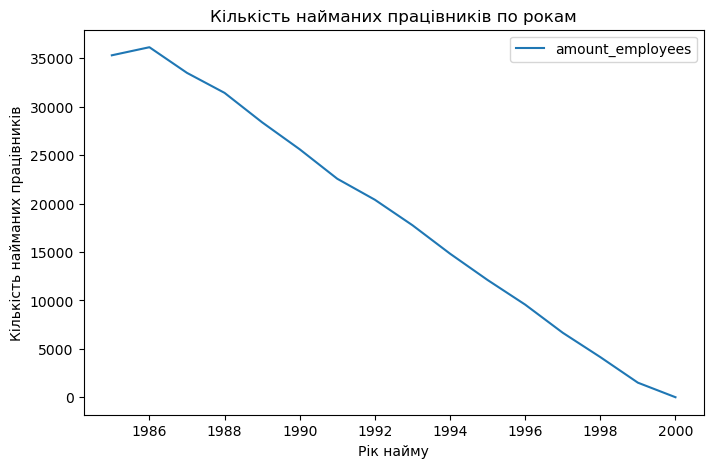

In [91]:
df.plot('hire_year', 'amount_employees', figsize = (8,5))
plt.title('Кількість найманих працівників по рокам')
plt.xlabel('Рік найму')
plt.ylabel('Кількість найманих працівників');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [127]:
eng_diff_year = """
SELECT 
    emp_no,
    from_date,
    to_date,
    TIMESTAMPDIFF (YEAR, from_date, to_date) as work_year
FROM titles 
WHERE title = "Engineer" AND to_date != "9999-01-01"
"""

In [136]:
df_years = pd.read_sql(eng_diff_year, con)
df_years

,emp_no,from_date,to_date,work_year
0,10004,1986-12-01,1995-12-01,9
1,10009,1990-02-18,1995-02-18,5
2,10012,1992-12-18,2000-12-18,8
3,10018,1987-04-03,1995-04-03,8
4,10026,1995-03-20,2001-03-19,5
...,...,...,...,...
84015,499972,1989-11-23,1998-11-23,9
84016,499984,1989-07-30,1994-07-30,5
84017,499994,1993-02-22,1993-10-27,0
84018,499996,1996-05-13,2002-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

In [162]:
df_years['work_year'].unique()

array([9, 5, 8, 6, 7, 1, 0, 3, 2, 4])

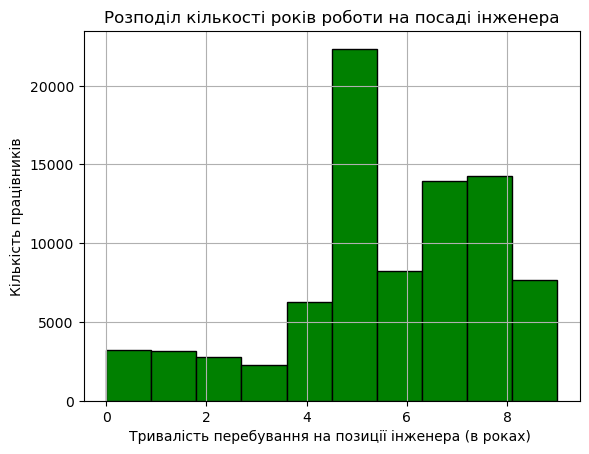

In [172]:
df_years['work_year'].hist(bins = 10, color='green', edgecolor='black' )
plt.title('Розподіл кількості років роботи на посаді інженера')
plt.xlabel('Тривалість перебування на позиції інженера (в роках) ')
plt.ylabel('Кількість працівників');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [174]:
con.close()